Capstone 2 Fake account predictor- Exploratory Data Analysis.

The goal is to conduct EDA on the to examine relationships between variables and other patterns in the data.

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

In [10]:
account_clean=pd.read_csv('../accounts_data_cleaned.csv')
#print(account_clean.head())
account_clean.info()
account_clean.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64243 entries, 0 to 64242
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       64243 non-null  int64  
 1   posts            64243 non-null  int64  
 2   flw              64243 non-null  int64  
 3   flg              64243 non-null  int64  
 4   pic              64243 non-null  int64  
 5   link             64243 non-null  int64  
 6   caption_len_avg  64243 non-null  int64  
 7   cap_zero_per     64243 non-null  float64
 8   no_image_per     64243 non-null  float64
 9   likes_rate       64243 non-null  float64
 10  comment_rate     64243 non-null  float64
 11  loc_tag          64243 non-null  float64
 12  hash_count       64243 non-null  float64
 13  cosine_sim_avg   64243 non-null  float64
 14  post_interval    64243 non-null  float64
 15  class            64243 non-null  object 
dtypes: float64(8), int64(7), object(1)
memory usage: 7.8+ MB


Index(['Unnamed: 0', 'posts', 'flw', 'flg', 'pic', 'link', 'caption_len_avg',
       'cap_zero_per', 'no_image_per', 'likes_rate', 'comment_rate', 'loc_tag',
       'hash_count', 'cosine_sim_avg', 'post_interval', 'class'],
      dtype='object')

0          44
1          10
2          33
3          70
4           3
         ... 
64238      13
64239     652
64240    1500
64241     329
64242     206
Name: posts, Length: 63587, dtype: int64


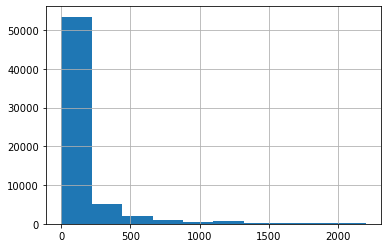

In [11]:
#print(account_clean.posts.value_counts())

# Now I will systematicly check and trim the remaining features. I created a function that will trim outliers
# by excluding values above 99th perccentile and will plot a histogram. 

def trim(column, quantile):
    q=column.quantile(quantile)
    column_a=column[column<q]
    return column_a.value_counts(), column_a.hist(), column_a

count,hist, posts_a=trim(account_clean.posts, 0.99)

print(posts_a)
#print(account_clean.posts.value_counts())


0          48
1          66
2         970
3          86
4          21
         ... 
64238     145
64239    3000
64240    3700
64241    1500
64242     659
Name: flw, Length: 63595, dtype: int64


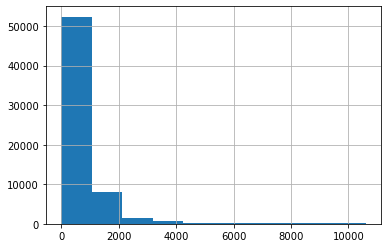

In [12]:
#print(account_clean.flw.value_counts())
x,y,flw_a=trim(account_clean.flw, 0.99)
print(flw_a)

0         325
1         321
2         308
3         360
4         285
         ... 
64238     642
64239    1300
64240    3200
64241    1800
64242     608
Name: flg, Length: 62071, dtype: int64


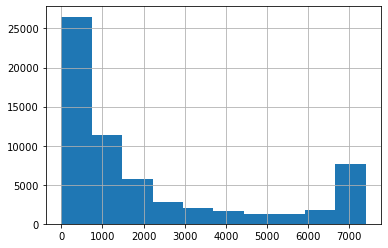

In [13]:
#print(account_clean.flg.value_counts())

count,hist, flg_a=trim(account_clean.flg, 0.99)

print(flg_a)



0        0.000
1        1.500
2        2.500
3        0.000
4        0.000
         ...  
64238    0.077
64239    1.611
64240    0.000
64241    0.500
64242    0.222
Name: hash_count, Length: 63597, dtype: float64
46.333452671886434


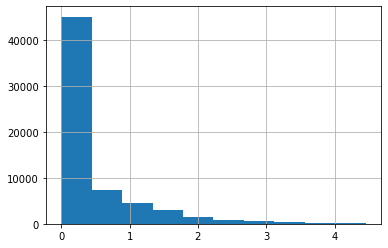

In [14]:
count,hist,hash_a=trim(account_clean.hash_count, 0.99)

print(hash_a)
    
print(29766*100/len(account_clean.hash_count))

#This shows that qlmost 50% of the data has the value 0.

0     0.00
1    14.39
2    10.10
3     0.78
4    14.29
Name: likes_rate, dtype: float64


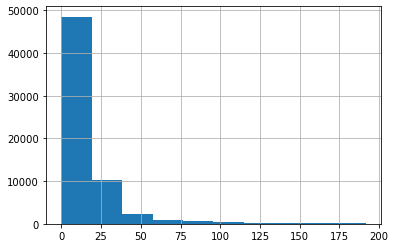

In [15]:
count,hist,likes_a=trim(account_clean.likes_rate, 0.99)

print(likes_a.head()) 
#print(count)

0    0.00
1    1.97
2    0.30
3    0.06
4    0.00
Name: comment_rate, dtype: float64


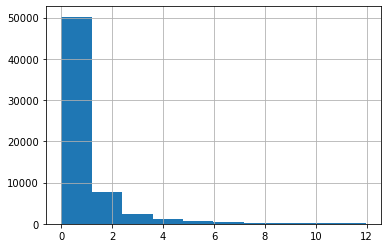

In [16]:
count,hist,comment_r_a=trim(account_clean.comment_rate, 0.99)

print(comment_r_a.head())
#print(count)


0     12
1    213
2    436
3      0
4     93
Name: caption_len_avg, dtype: int64


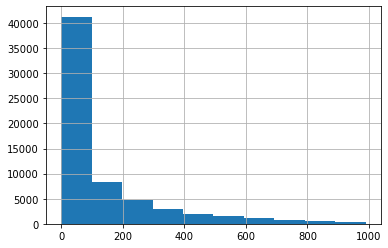

In [17]:
count,hist,cap_avg_a=trim(account_clean.caption_len_avg, 0.99)

print(cap_avg_a.head())
#print(count)

0      0.094985
1    230.412857
2     43.569939
3      5.859799
4      0.126019
Name: post_interval, dtype: float64


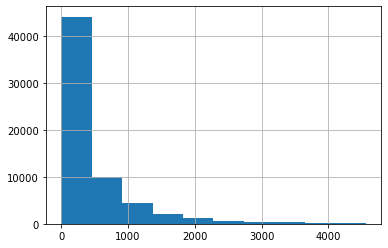

In [18]:
count,hist,post_interval_a=trim(account_clean.post_interval, 0.99)

print(post_interval_a.head())


In [19]:
account_clean.columns

Index(['Unnamed: 0', 'posts', 'flw', 'flg', 'pic', 'link', 'caption_len_avg',
       'cap_zero_per', 'no_image_per', 'likes_rate', 'comment_rate', 'loc_tag',
       'hash_count', 'cosine_sim_avg', 'post_interval', 'class'],
      dtype='object')

In [21]:
new_features=[posts_a, flw_a, flg_a,cap_avg_a,
       likes_a, comment_r_a, hash_a, post_interval_a]

#list= feature["Unnamed: 0" < 62071] for feature in new_features if 

#feature_list=[]
#for feature in new_features:
   # feature_b=feature[:62071]
 #   feature_list.append(feature_b)
#print(feature_list)


#accounts_features=pd.DataFrame(index=new_features)
#accounts_features.head()

account_try= account_clean

#for f in new_features:
    #account_try[f]=f
    #print (account_try[f])
#print(account_try.head())    


In [ ]:
#account_clean

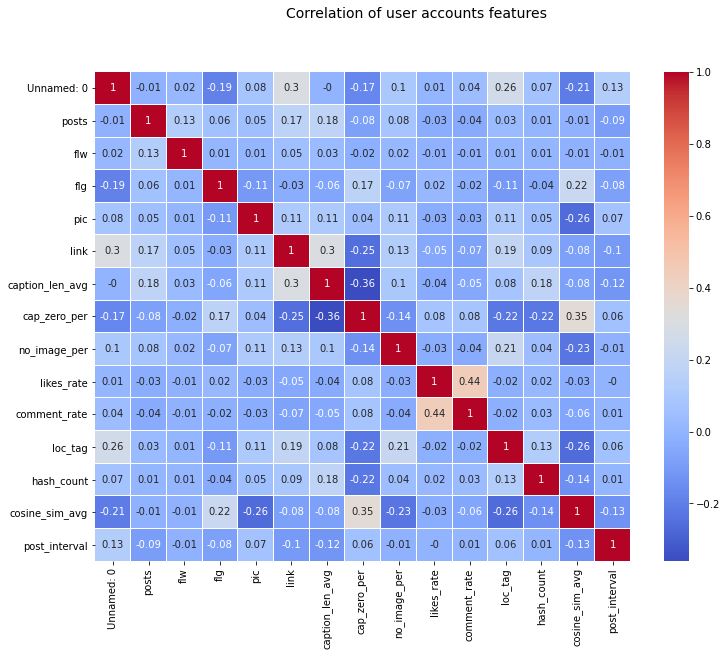

In [22]:
corr_map = account_clean.corr()
fig, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corr_map,2), annot=True, cmap="coolwarm",
                 linewidths=.05)
t= fig.suptitle('Correlation of user accounts features ', fontsize=14)


# The corralations matrix shows that the features are not highly correlated with each other.
# The only features that are correlated are likes_rate and comment_rates which makes sense.
#Later there we can decide if to use both or only one of the two features.

In [23]:
account_add=account_clean
account_add['posts_a']=posts_a

account_add['posts_a']= account_add['posts_a'].fillna(account_add['posts_a'].mean())

print(account_add.columns)
#print(posts_b.mean())
#print(posts_a.mean())

#print(account_add.head())
#x=account_clean.groupby('class')['posts_a'].mean()


Index(['Unnamed: 0', 'posts', 'flw', 'flg', 'pic', 'link', 'caption_len_avg',
       'cap_zero_per', 'no_image_per', 'likes_rate', 'comment_rate', 'loc_tag',
       'hash_count', 'cosine_sim_avg', 'post_interval', 'class', 'posts_a'],
      dtype='object')


In [25]:
trimed_col={'flw_a':flw_a, 'flg_a':flg_a, 'likes_a':likes_a, 'hash_a':hash_a, 'cap_avg_a':cap_avg_a,'comment_r_a':comment_r_a, 'post_interval_a':post_interval_a}

account_add=account_add.assign(**trimed_col)
#print(account_add.head())

for column, values in account_add.iteritems():
    if column in trimed_col:
        account_add[column]= account_add[column].fillna(values.mean()) 
        
print (account_add.flw_a.mean(), flw_a.mean(), posts_a.mean(), account_add.posts_a.mean())



664.880918311191 664.880918311188 132.5725698649095 132.57256986490876


In [26]:
fake_posts=account_add[account_add['class']=='f']['posts_a']
real_posts=account_add[account_add['class']=='r']['posts_a']
#print(fake_posts, real_posts)


ttest_ind(real_posts, fake_posts)

Ttest_indResult(statistic=8.579371175533954, pvalue=9.747968251349588e-18)

In [27]:

mean_features_by_class=account_clean.groupby('class')[['posts', 'flw', 'flg', 'caption_len_avg',
       'cap_zero_per', 'no_image_per', 'likes_rate', 'comment_rate',
       'hash_count', 'cosine_sim_avg', 'post_interval']].mean()
print(mean_features_by_class.T)


class                      f            r
posts             167.147563   191.689495
flw               734.287009  1660.926001
flg              3338.211969  1277.657363
caption_len_avg   125.053739   152.307671
cap_zero_per        0.329300     0.180595
no_image_per        0.157844     0.234323
likes_rate         21.045776    17.925925
comment_rate        1.018695     1.295645
hash_count          0.412846     0.617707
cosine_sim_avg      0.390717     0.191118
post_interval     362.096483   644.615709


In [28]:
mean_features_by_pic=account_clean.groupby('pic')[['posts', 'flw', 'flg', 'caption_len_avg',
       'cap_zero_per', 'no_image_per', 'likes_rate', 'comment_rate',
       'hash_count', 'cosine_sim_avg', 'post_interval']].mean()
print(mean_features_by_pic.T)


pic                        0            1
posts              11.597942   186.699865
flw               244.759527  1243.273227
flg              3648.475991  2239.529171
caption_len_avg    26.419588   143.610980
cap_zero_per        0.187347     0.257010
no_image_per        0.059625     0.202315
likes_rate         35.779291    18.774868
comment_rate        2.026322     1.121679
hash_count          0.221579     0.528909
cosine_sim_avg      0.713366     0.271831
post_interval     170.762420   519.071355


In [29]:
mean_features_by_link=account_clean.groupby('link')[['posts', 'flw', 'flg', 'caption_len_avg',
       'cap_zero_per', 'no_image_per', 'likes_rate', 'comment_rate',
       'hash_count', 'cosine_sim_avg', 'post_interval']].mean()
print(mean_features_by_link.T)

link                       0            1
posts             102.077642   372.312646
flw               499.527757  2951.628550
flg              2347.266617  2172.194657
caption_len_avg    98.132938   240.074388
cap_zero_per        0.307748     0.120835
no_image_per        0.175914     0.247675
likes_rate         23.126918    10.368644
comment_rate        1.417461     0.514592
hash_count          0.450179     0.681022
cosine_sim_avg      0.307715     0.245453
post_interval     566.824173   350.624635


In [30]:
old_columns=['posts', 'flw', 'flg', 'caption_len_avg',
       'likes_rate', 'comment_rate', 'hash_count', 'post_interval']

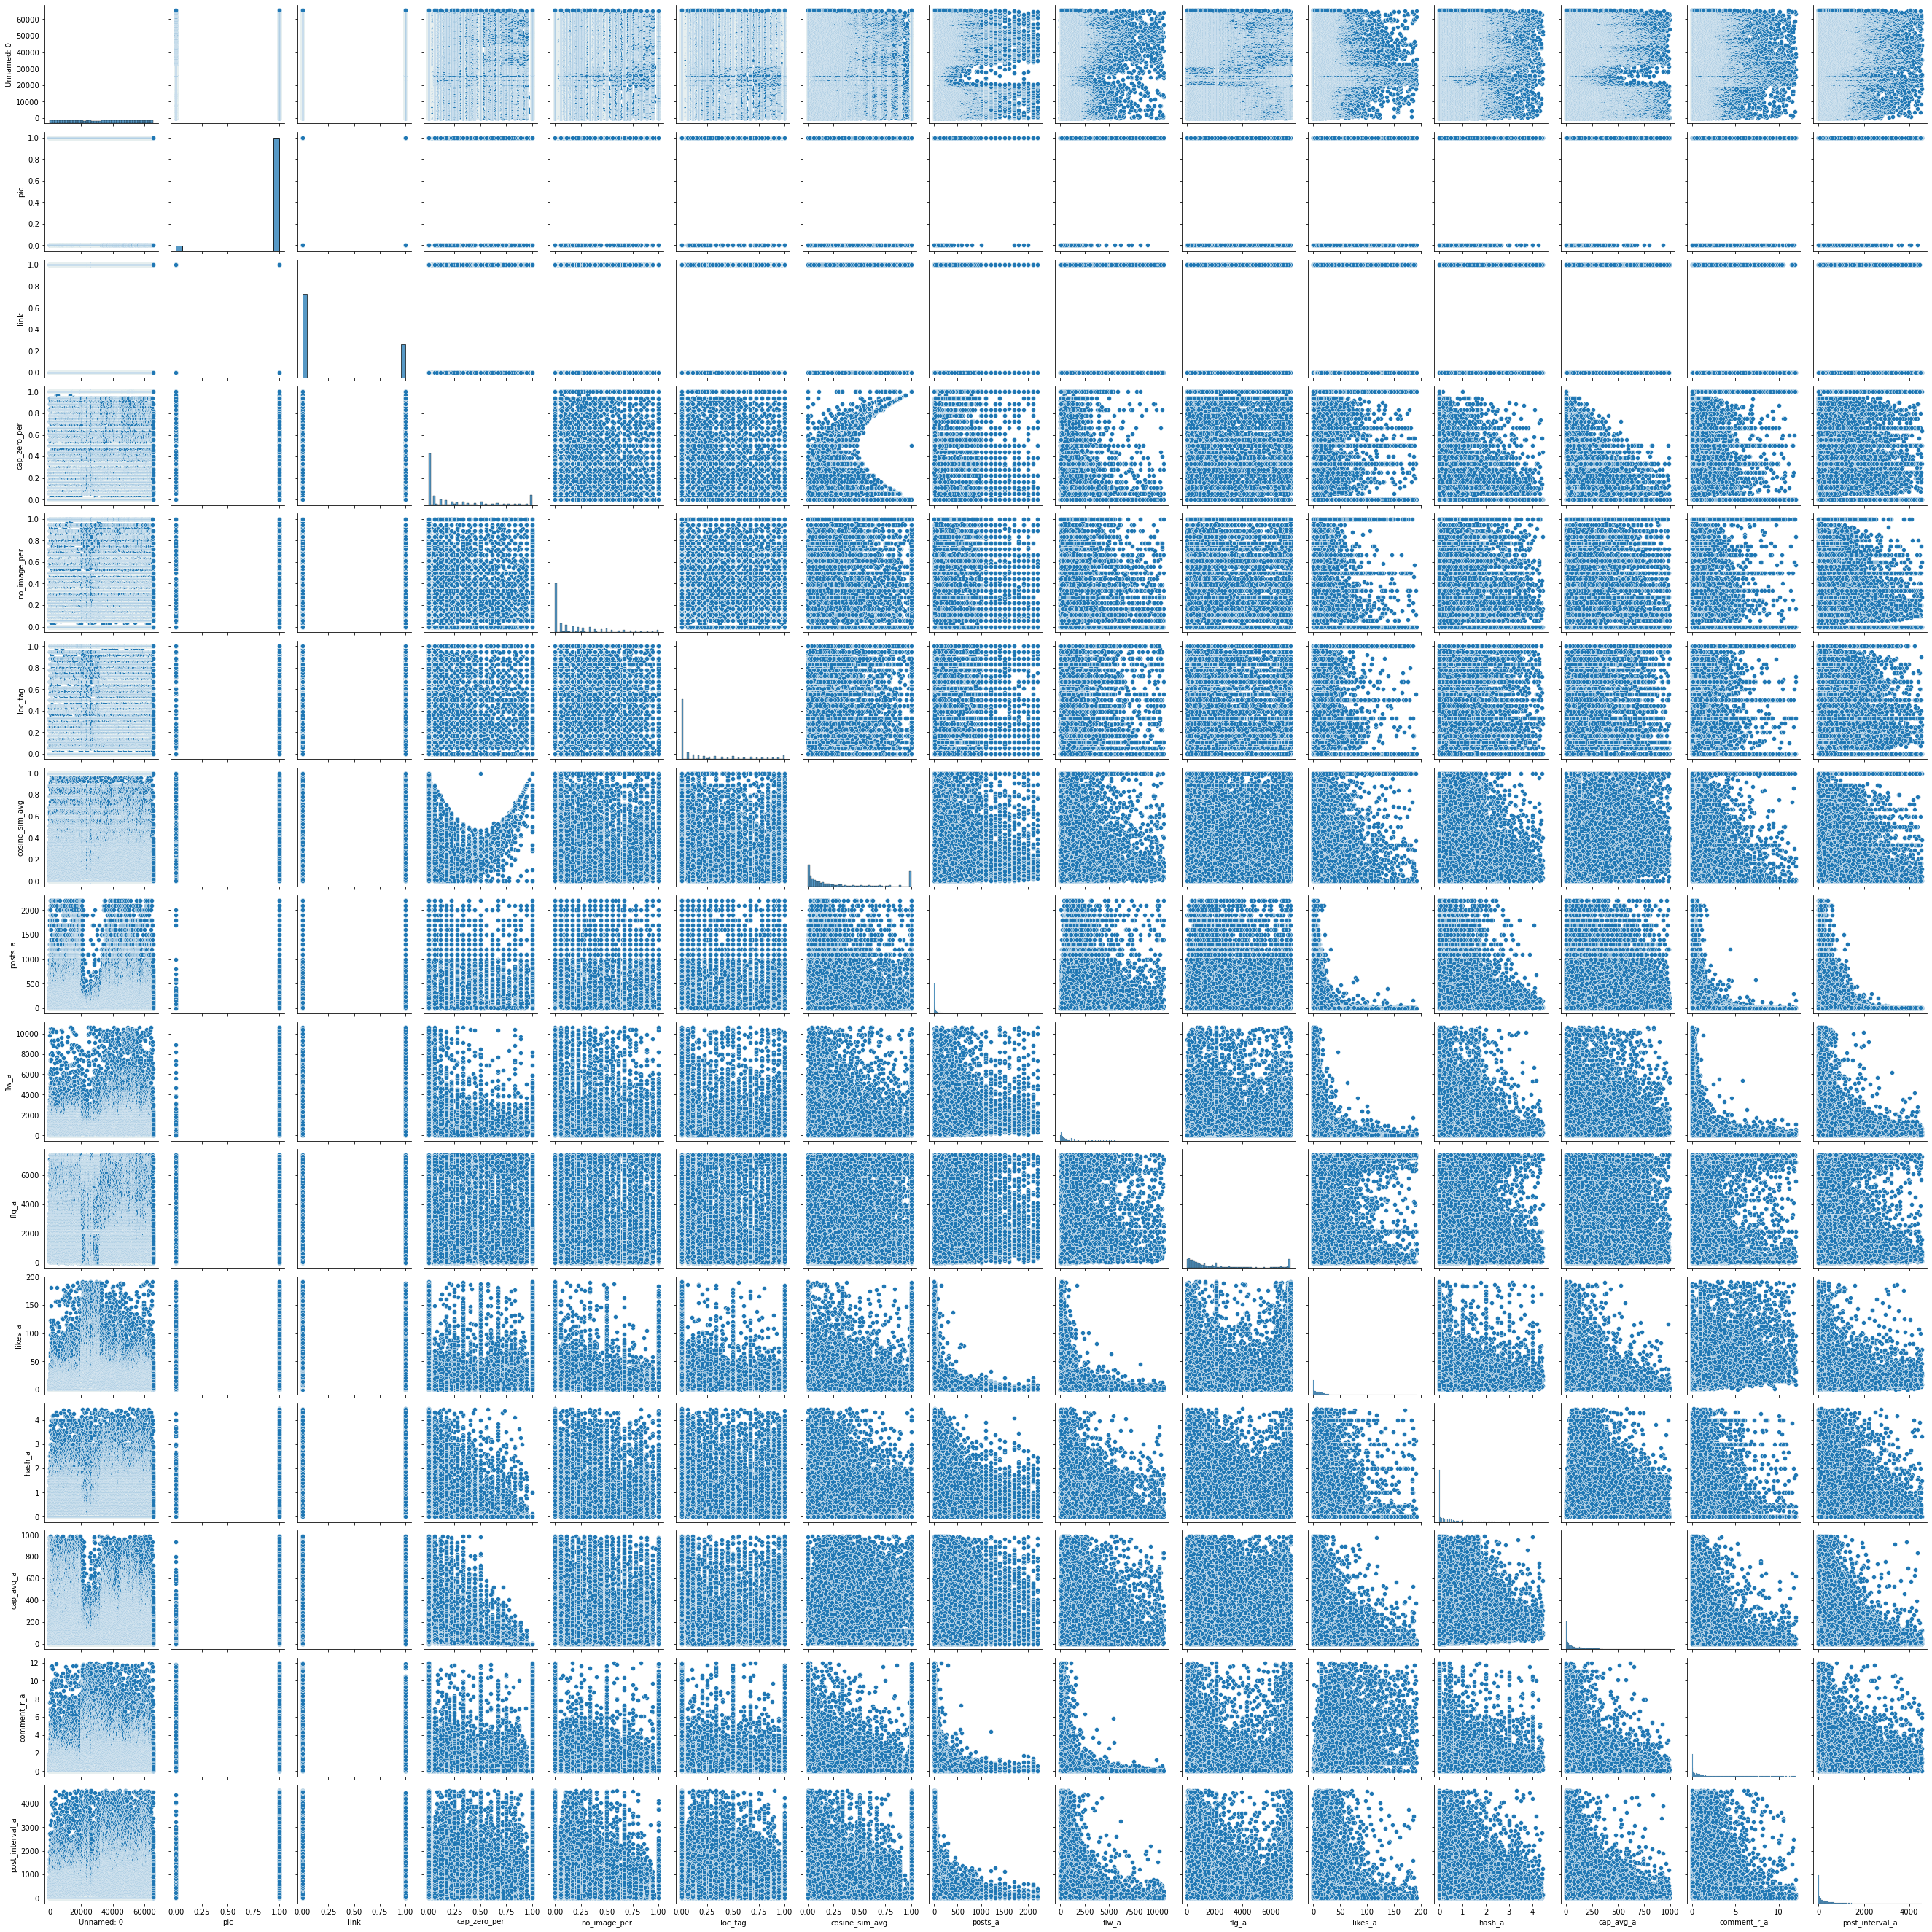

In [31]:
columns_to_plot=account_add[[x for x in account_add if x not in old_columns]]
#columns.columns
sns.pairplot(columns_to_plot)


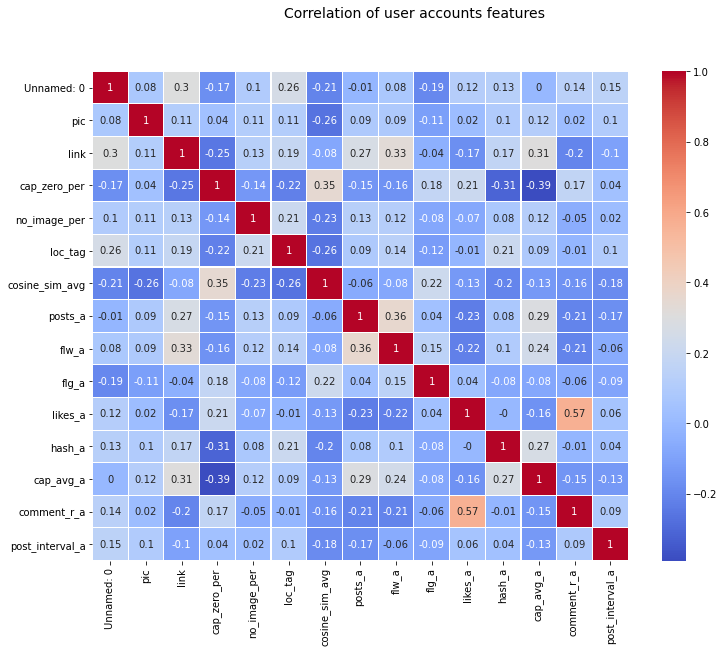

In [32]:
corr_map = columns_to_plot.corr()
fig, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corr_map,2), annot=True, cmap="coolwarm",
                 linewidths=.05)
t= fig.suptitle('Correlation of user accounts features ', fontsize=14)
# The trimmed data shows the same correlations, but stronger

In [33]:
tstats = {}
ix_a = account_add['class'] == 'f'
for x in account_add:
    if x != 'class':
        tstats[x] = stats.ttest_ind(account_add[x][ix_a], account_add[x][~ix_a])
       
        

t_table=pd.DataFrame(tstats)
#print(t_table.T)
means=account_add.groupby('class').mean()
#print(means)
t_and_means=pd.concat([means, t_table])
t_and_means=t_and_means.T

t_and_means.rename(columns={'f':'mean_fake', 'r':'mean_real', 0:'t', 1:'p_value'}, inplace=True)
print(t_and_means)

                    mean_fake     mean_real           t        p_value
Unnamed: 0       16074.392096  49095.500000 -445.456566   0.000000e+00
posts              167.147563    191.689495   -4.265724   1.995399e-05
flw                734.287009   1660.926001   -5.365661   8.093159e-08
flg               3338.211969   1277.657363  110.752665   0.000000e+00
pic                  0.929333      0.988355  -38.214721   0.000000e+00
link                 0.121291      0.448614  -98.394362   0.000000e+00
caption_len_avg    125.053739    152.307671  -15.962802   2.991785e-57
cap_zero_per         0.329300      0.180595   56.956384   0.000000e+00
no_image_per         0.157844      0.234323  -38.626598   0.000000e+00
likes_rate          21.045776     17.925925    3.239889   1.196372e-03
comment_rate         1.018695      1.295645   -5.993294   2.067242e-09
loc_tag              0.117158      0.305652  -83.360005   0.000000e+00
hash_count           0.412846      0.617707  -22.375515  1.805987e-110
cosine

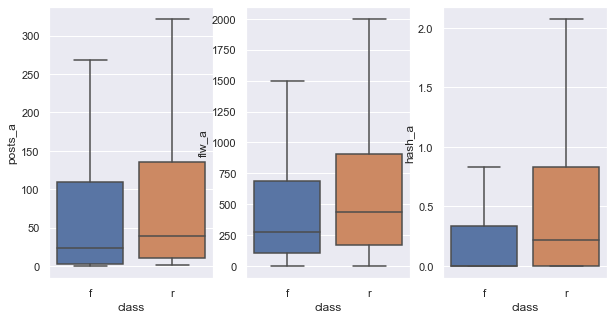

In [34]:
to_plot=account_add[['flw_a', 'flg_a','likes_a', 'hash_a', 'cap_avg_a','comment_r_a', 'post_interval_a']]

sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots(1,3)
sns.boxplot(x='class', y='posts_a',data=account_add, showfliers=False, ax=ax[0])
sns.boxplot(x='class', y='flw_a',data=account_add, showfliers=False, ax=ax[1])
sns.boxplot(x='class', y='hash_a',data=account_add, showfliers=False,  ax=ax[2])
plt.show()

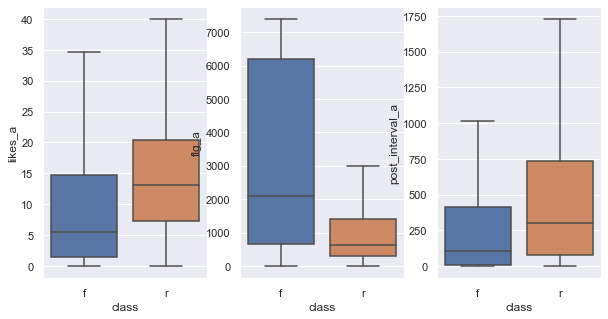

In [49]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots(1,3)
sns.boxplot(x='class', y='likes_a',data=account_add, showfliers=False,  ax=ax[0])
sns.boxplot(x='class', y='flg_a',data=account_add, showfliers=False,  ax=ax[1])
sns.boxplot(x='class', y='post_interval_a',data=account_add, showfliers=False,  ax=ax[2])

plt.show()

In [36]:
# Chi square test was performed to check the categorical features 
# The test were significant
data1 = pd.crosstab(account_add['class'], account_add['link']) 
stat, p, dof, expected = stats.chi2_contingency(data1)
print(stat)
print(p)

data = pd.crosstab(account_add['class'], account_add['pic']) 
stat, p, dof, expected = stats.chi2_contingency(data)
print(stat)
print(p)
print(expected)

8412.154975135698
0.0
1426.4431827965516
0.0
[[ 1298.17399561 30484.82600439]
 [ 1325.82600439 31134.17399561]]


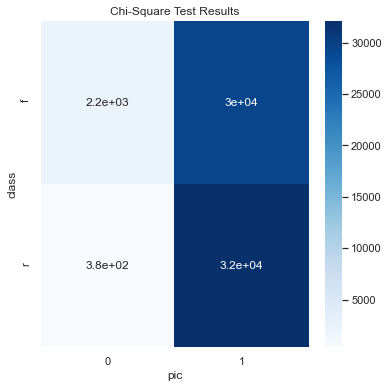

In [37]:
fig = plt.figure(figsize=(6,6))
sns.heatmap(data, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

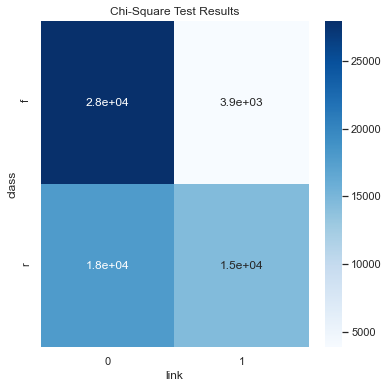

In [38]:
fig = plt.figure(figsize=(6,6))
sns.heatmap(data1, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

In [39]:
stats.ttest_ind(account_add[account_add['class']=='f']['flw_a'], account_add[account_add['class']=='r']['flw_a'])

Ttest_indResult(statistic=-28.810857511025816, pvalue=2.2530499979422695e-181)

In [40]:
account_add.to_csv('../accounts_data_trim.csv')